# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable od predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.
There is also a version of it available on Kaggle.

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
 This is wher yuou'll get different information about each of the features in your data.


In [1]:
# !pip install -U scikit-learn

# # !pip install scikit-learn==1.2.2
# !pip install scikit-learn==1.3.0
# !pip install --upgrade xgboost
# import sklearn
# import xgboost
# print(sklearn.__version__)
# print(xgboost.__version__)

In [2]:
# import sklearn
# sklearn.__version__

In [3]:
# !pip install xgboost==1.6.2


In [4]:
# !pip show xgboost
# !pip show scikit-learn  # if xgboost = 1.6.2 th scikit learn should be >=1.2.0

## Preparing the tools 
we're going to use pandas ,Matplotlib and Numpy for data analysis and manipulation.

In [6]:
#import all the tools we need

#Regular EDA ( exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 ##we want our plots to appear inside the notebook
%matplotlib inline

#Models from Scikit -learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
#Model Evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [7]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.shape#(rows, column)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you are working with.
1. What questions are you trying to solve ?
2. What kind of data do we have and how we treat different types?
3. What is missing from the data nad how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change and remove features to get more out of your data?


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
#Lets find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

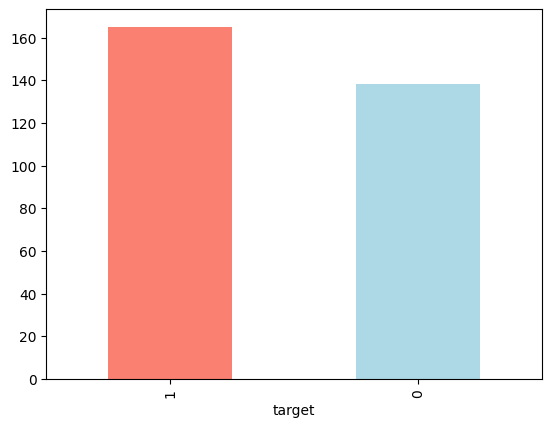

In [12]:
df["target"].value_counts().plot(kind='bar', color= ["salmon","lightblue"]);
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [16]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [17]:
#COMPARE TARGET COLUMN WITH SEX COLUMN
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


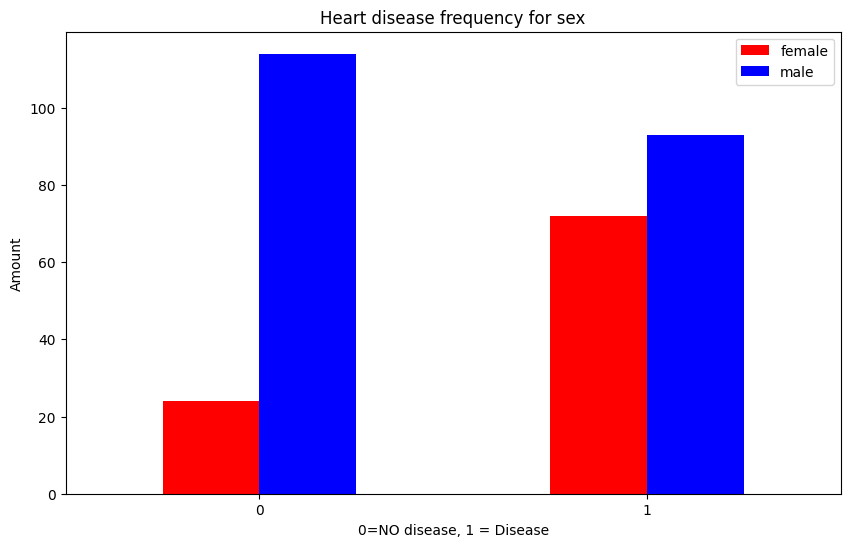

In [18]:
#Create a plot of the cross tab
pd.crosstab(df["target"],df["sex"]).plot(kind="bar", color =["red","blue"], figsize = (10,6))

plt.title("Heart disease frequency for sex")
plt.xlabel("0=NO disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['female',"male"])
plt.xticks(rotation = 0)
plt.show()

### Age vs Max Heart Rate for  Heart Disease

In [19]:
df["age"][df["target"]==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

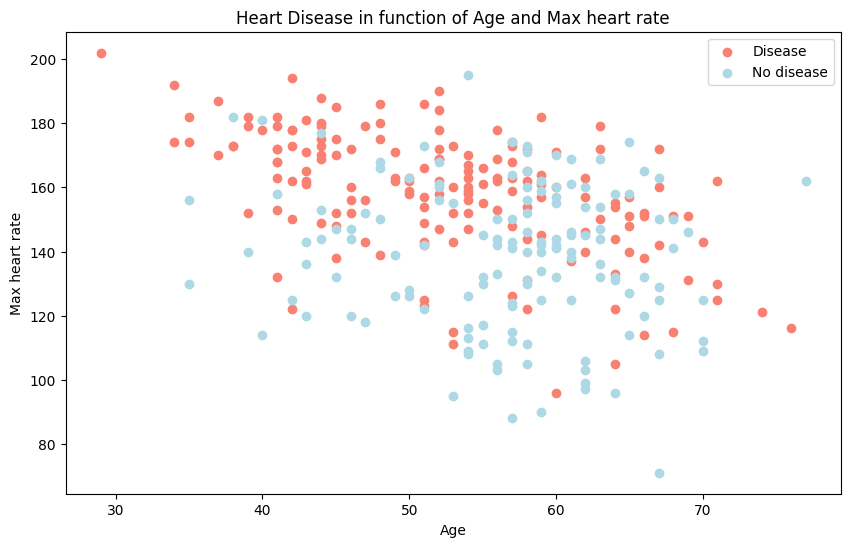

In [20]:
#create another figure

plt.figure(figsize = (10,6))

#Scatter wuth positive examples
plt.scatter(df["age"][df["target"]==1],
             df["thalach"][df["target"]==1],
             c="salmon")

#Scatter with negative examples
plt.scatter(df["age"][df["target"]==0],
             df["thalach"][df["target"]==0],
             c="lightblue")

#Add some helpful info
plt.title("Heart Disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No disease"])
plt.show()

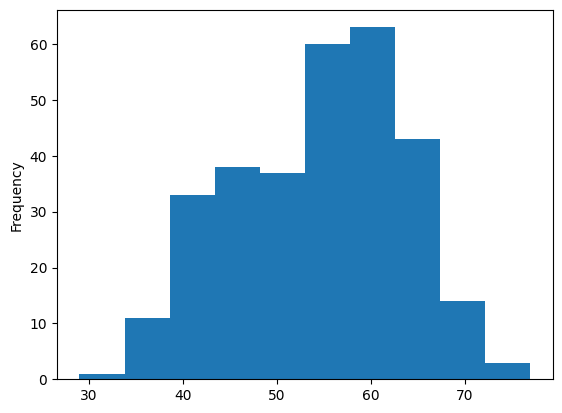

In [21]:
#CHeck the distribution of the age column with a histogram
df.age.plot.hist()
plt.show()

## Heart disease frequency per chest pain type
cp - chest pain type
> * 0: Typical angina: chest pain related decrease blood supply to the heart
> * 1: Atypical Angina : chest pain not related to heart
> * 2: Non-anginal pain: tupically esophageal spasms(non heart related)
> * 3: Asymptomatic :chest pain noy showing signs of disease

In [22]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


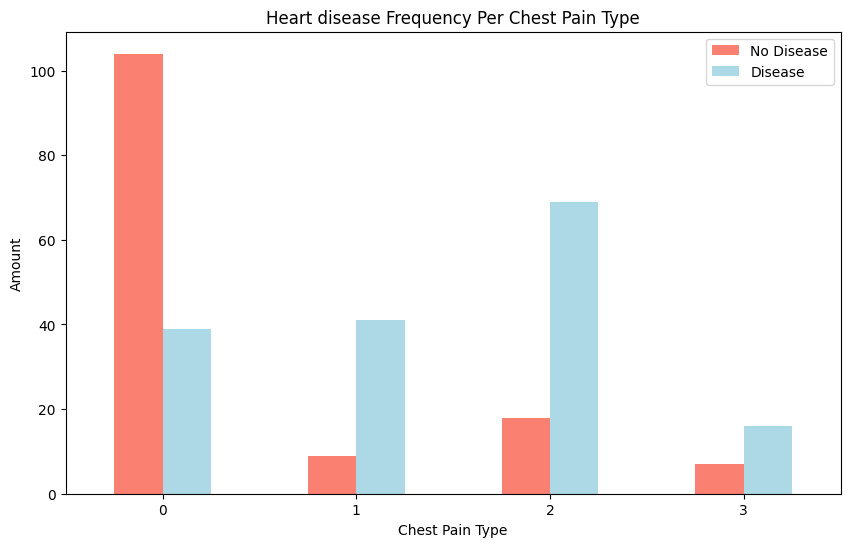

In [23]:
pd.crosstab(df["cp"],df["target"]).plot(kind = "bar", figsize = (10,6), color =["salmon","lightblue"])


#Add some communication
plt.title("Heart disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0)
plt.show()


In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


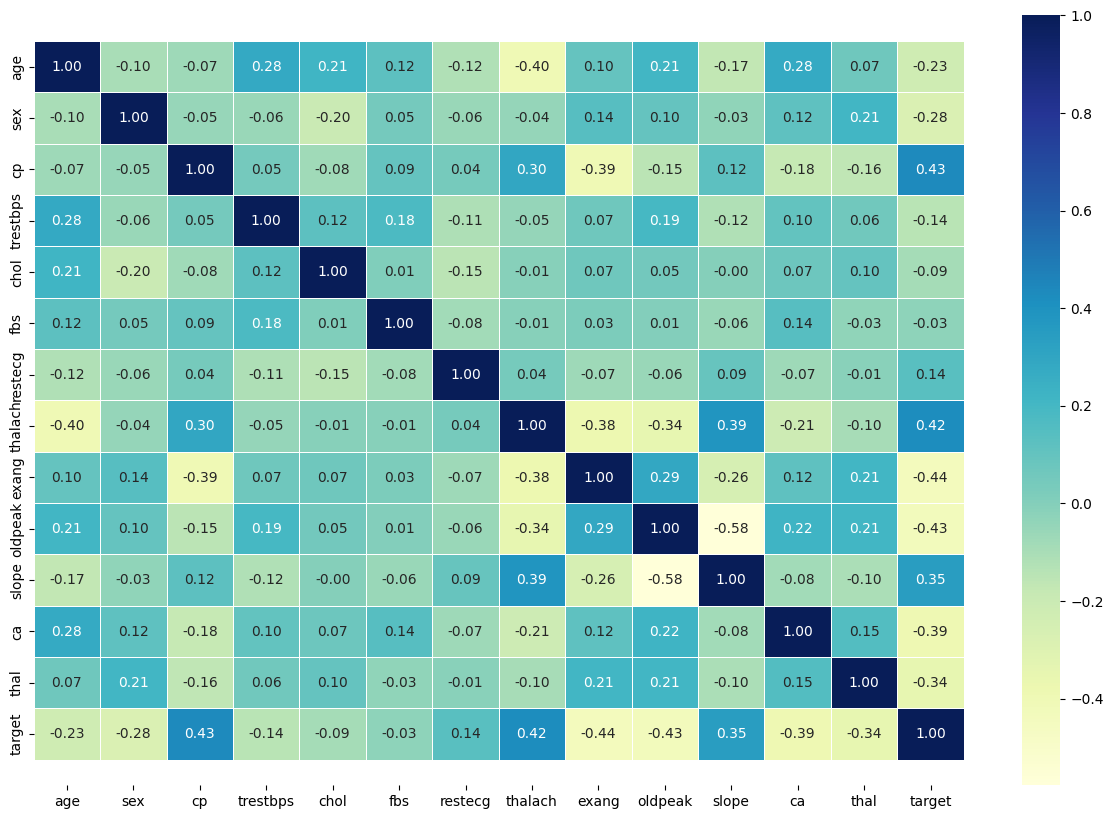

In [26]:
# Lets make our correlation matrix a little prettier

corr_matrix = df.corr()
fig, ax = plt.subplots( figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 fmt = ".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## modelling

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# split data into X and y 
X = df.drop("target",axis =1)
y = df["target"]


In [29]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [31]:
# split data into train and test sets
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [32]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [33]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [34]:
# #Scalling the independant variable
# from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()
# X_train= scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)


Now we've got our data split into training and test sets, its time to build machine learning product
we'll train it (find patterns) on the training set
and we'll test it  (use the patterns) on the test set

We're going to try out 5 different machine learning models:
1. Logistic Regression
2. K- Nearest Neighbours Classifier
3. Random Forest Classifier
4. SVC
5. XG boost --> We experimented so that we could improve the litlle bit of the accurary  

In [35]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "SVC": SVC(),
          "XGBoost": XGBClassifier()}

#Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-learn machine learning models

    X_train :training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_ test :test labels
    """
     # set random seed
    np.random.seed(42)
    # make a  dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [36]:
model_scores = fit_and_score(models= models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)


model_scores

C:\Users\wwwma\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'SVC': 0.7049180327868853,
 'XGBoost': 0.819672131147541}

## Model Comparison

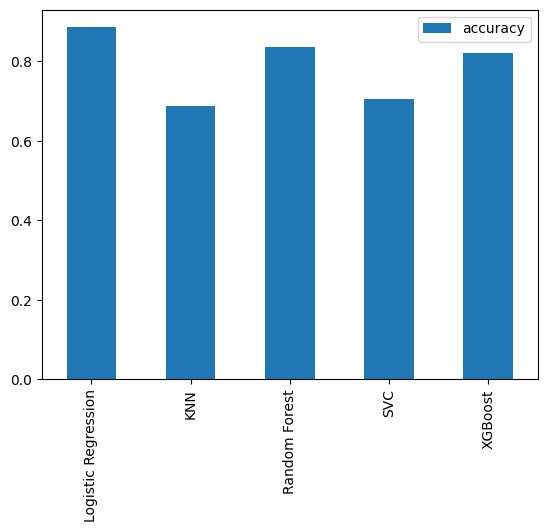

In [37]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()
plt.show()

Now weve got baseline model ......and we know a models first prediction arent always what we should based our next steps off what should we do?

Lets look at the following:

* Hyper parameter tuning
* Feature Importance
* Confusion matrix
* Cross- validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyper parameter tuning

In [38]:
#lets tune KNN
train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(X_train, y_train)

    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

    


In [39]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [40]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


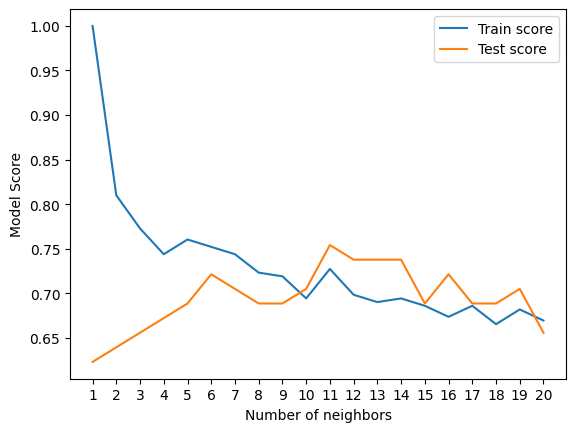

In [41]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")

plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
plt.show()

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune
1. LogisticRegression()
2. RandomForestClassifier()

.......using RandomizedSearchCV

)

In [42]:
# Create a hyperparameter grid for logistic Regression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10, 1000, 50 ),
          "max_depth":[None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each od our models, lets tune them using
RandomizedSearchCV

In [43]:
 #Hyperparameter Grid for SVC
svc_grid = {"C": [0.1, 1, 10, 100],
            "kernel": ["linear", "rbf", "poly", "sigmoid"],
            "gamma": ["scale", "auto"]}

In [44]:
#Tune LogisticRegression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose =True)

# For random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [46]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned logistic regression lets do the same for randomForestClassifier()

In [47]:
# xgb_grid = {
#     "n_estimators": [100, 200, 300],
#     "learning_rate": [0.01, 0.1, 0.2],
#     "max_depth": [3, 5, 7],
#     # "subsample": [0.5, 0.7, 1.0],
#     #"colsample_bytree": [0.5, 0.7, 1.0]
# }

# # Perform RandomizedSearchCV for XGBoost
# rs_xgb = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_grid, cv=5, n_iter=20, verbose=True)
# rs_xgb.fit(X_train, y_train)
# print(rs_xgb.best_params_)
# print(rs_xgb.score(X_test, y_test))

In [48]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose = True)
#Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
# Find the best hyperparameters

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [50]:
#Evaluate the randomized search RandomForestClassifier model

rs_rf.score(X_test, y_test)

0.8688524590163934

In [51]:
#  #Hyperparameter Search for SVC
# rs_svc = RandomizedSearchCV(SVC(), param_distributions=svc_grid, cv=3, n_iter=20, verbose=True)
# rs_svc.fit(X_train, y_train)
# rs_svc.best_params_
# rs_svc.score(X_test, y_test)

In [52]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'SVC': 0.7049180327868853,
 'XGBoost': 0.819672131147541}

## Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we wil try and improve them again using GridSearchCV...

In [53]:
#Different hyperparameter for our Logistic Regression model
log_reg_grid = {'C':np.logspace(-4, 4, 30),
                "solver":["liblinear"]}

# Setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [54]:
#Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
#Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [56]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'SVC': 0.7049180327868853,
 'XGBoost': 0.819672131147541}

#### Evaluating out tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1- score

..... and it would be great  if cross-validation was used where possible

To make comparision and evaluate our trained model, first we need to make prediction


In [57]:
# Make oredictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
y_test


179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

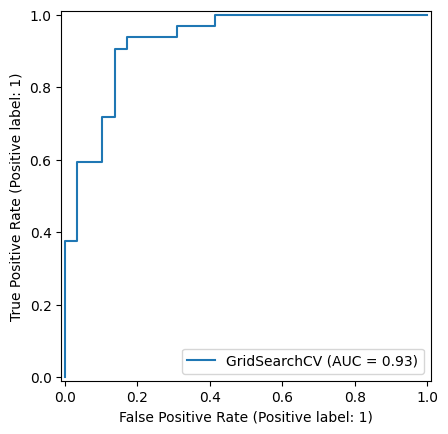

In [59]:
# IMport ROc curve function  from the sklearn.metrics modele
# As it is already imported above we donot have to import it againso, 
# Plot ROC curve and calculate and calculate AUC metric

RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

In [60]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


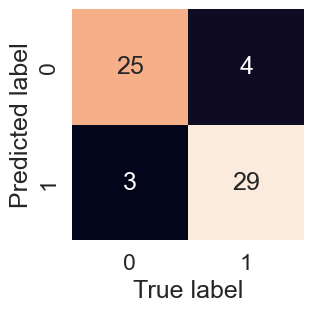

In [61]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_pred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    
    """
    fig, ax = plt.subplots(figsize =(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.show()
    # bottom, top = ax.get_ylim()  # use this if the plotting of the consion matrics values are not arranged properly
    # ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test,y_preds)
plt.show()

Now we"ve got a RUC curve , and Auc metrics and a confusion matrix. lets get a classification report as wellas  cross validated precision, recall and f1-score.

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

We,re going to calculate accuracy, precision, recall and f1- score of our model using cross-validation and to di so we'll be using `cross_val_score()`

In [63]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [64]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver= "liblinear")

In [65]:
# Cross - validated accuracy
cv_acc = cross_val_score(clf,
                          X,
                          y,
                          cv =5,
                          scoring ="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [66]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8446994535519124

In [67]:
# Cross - validated precision
cv_precision = cross_val_score(clf,
                          X,
                          y,
                          cv =5,
                          scoring ="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [68]:
# Cross - validated recall
cv_recall = cross_val_score(clf,
                          X,
                          y,
                          cv =5,
                          scoring ="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [69]:
# Cross - validated f1-score
cv_f1 = cross_val_score(clf,
                          X,
                          y,
                          cv =5,
                          scoring ="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

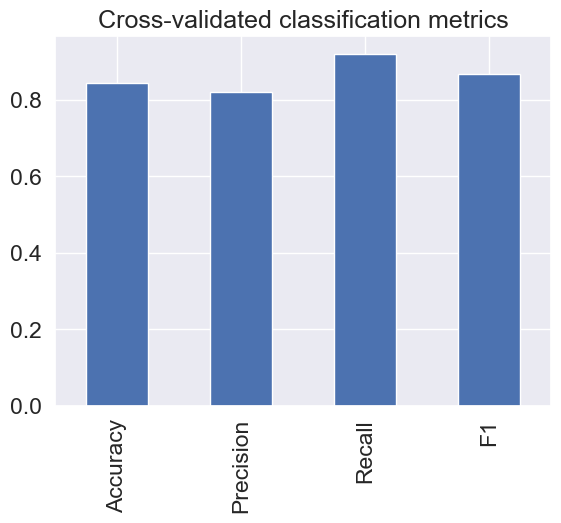

In [70]:
#Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend = False)
plt.show()

###  Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of themodel and how did they contriibute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance". 

Let's find the feature importance for our LogisticRegression model..

In [71]:
# Fit anistance of LogisticRegression

gs_log_reg.best_params_

clf = LogisticRegression(C =  0.20433597178569418,
                         solver = "liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [72]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [73]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

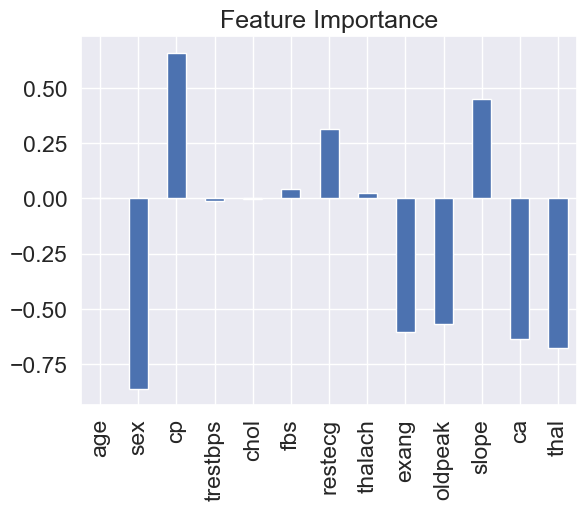

In [75]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title ="Feature Importance", legend = False)
plt.show()

In [76]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [77]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [78]:
# Example after running RandomizedSearchCV
best_params_random = rs_log_reg.best_params_

# Example after running GridSearchCV
best_params_grid = gs_log_reg.best_params_

# Compare the scores
score_random = rs_log_reg.score(X_test, y_test)
score_grid = gs_log_reg.score(X_test, y_test)

print("RandomizedSearchCV best parameters:", best_params_random)
print("RandomizedSearchCV score:", score_random)
print("GridSearchCV best parameters:", best_params_grid)
print("GridSearchCV score:", score_grid)


RandomizedSearchCV best parameters: {'solver': 'liblinear', 'C': 0.23357214690901212}
RandomizedSearchCV score: 0.8852459016393442
GridSearchCV best parameters: {'C': 0.20433597178569418, 'solver': 'liblinear'}
GridSearchCV score: 0.8852459016393442


In [79]:
import pickle

In [80]:
with open("best_logistic_regression_model.pkl", "wb") as f:
    pickle.dump(gs_log_reg, f)